In [34]:
class MyLinearRegression:
    def __init__(self, weight=9.04957055, bias=3.0767, learning_rate=0.1,
                 iterations=100):
        self.weight = weight
        self.bias = bias
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.cost_trend = []
        self.cost = 0

    def predict(self, x):
        predicted_set = []
        for i in range(len(x)):
            predicted_value = self.weight * x[i] + self.bias
            predicted_set.append(predicted_value)
        return predicted_set

    def cost_function(self, x, y):
        count = len(x)
        total_error = 0.0
        for i in range(count):
            total_error += (y[i] - (self.weight * x[i] +
                            self.bias)) ** 2
        return float(total_error) / (2 * count)

    def update_weights(self, x, y):
        weight_deriv = 0
        bias_deriv = 0
        count = len(x)

        for i in range(count):
            # Calculate partial derivatives
            # -2x(y - (mx + b))
            weight_deriv += -2 * x[i] * (y[i] -(self.weight * x[i] + self.bias))

            # -2(y - (mx + b))
            bias_deriv += -2 * (y[i] - (self.weight * x[i] +
                                self.bias))

        # We subtract because the derivatives point in direction of steepest
        # ascent
        self.weight -= (weight_deriv / count) * self.learning_rate
        self.bias -= (bias_deriv / count) * self.learning_rate

    def train(self, x, y):
        for i in range(self.iterations):
            self.update_weights(x, y)
            # Calculating cost
            self.cost = self.cost_function(x, y)
            self.cost_trend.append(self.cost)
           # if i % 10000 == 0:
            print("Iteration: {}\t Weight: {}\t Bias: {}\t Cost: {}".format(i, self.weight, self.bias, self.cost))

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# intialise data of lists. 
data = {'Value':[2,2,2,2,2,2,2,2,2,2,2], 
        'Multiple':[0,2,4,6,8,10,12,14,16,18,20]} 
  
# Create DataFrame 
tableoftwo = pd.DataFrame(data) 
  
# Print the output. 
tableoftwo 

,Value,Multiple
0,2,0
1,2,2
2,2,4
3,2,6
4,2,8
5,2,10
6,2,12
7,2,14
8,2,16
9,2,18


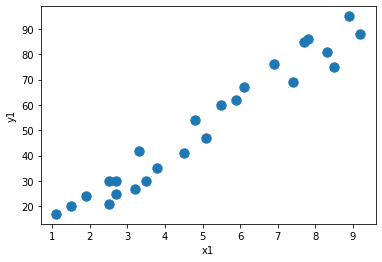

In [36]:
x=[2.5,5.1,3.2,8.5,3.5,1.5,9.2,5.5,8.3,2.7,7.7,5.9,4.5,3.3,1.1,8.9,2.5,1.9,6.1,7.4,2.7,4.8,3.8,6.9,7.8] 
y=[21,47,27,75,30,20,88,60,81,25,85,62,41,42,17,95,30,24,67,69,30,54,35,76,86]
plt.scatter(x,y,s=88)
plt.xlabel('x1')
plt.ylabel('y1')
plt.show()

In [37]:
#from my_linear_regression import MyLinearRegression
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# Importing the dataset

X = studentscores.iloc[:, : -1].values
y = studentscores.iloc[:, -1].values
X,y

(array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5],
        [1.5],
        [9.2],
        [5.5],
        [8.3],
        [2.7],
        [7.7],
        [5.9],
        [4.5],
        [3.3],
        [1.1],
        [8.9],
        [2.5],
        [1.9],
        [6.1],
        [7.4],
        [2.7],
        [4.8],
        [3.8],
        [6.9],
        [7.8]]),
 array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
        24, 67, 69, 30, 54, 35, 76, 86]))

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=0)

# Fitting Simple Linear Regression to the Training set
regressor = MyLinearRegression()
regressor.train(X_train, y_train)
print('Weight: ' + str(regressor.weight) + ' Bias: ' + str(regressor.bias))

# Predicting the Test set results
y_pred = regressor.predict(X_test)


Iteration: 0	 Weight: [13.82068159]	 Bias: [3.78719372]	 Cost: 308.5558171021351
Iteration: 1	 Weight: [-14.30683448]	 Bias: [-0.67452552]	 Cost: 10252.533526065885
Iteration: 2	 Weight: [151.80349479]	 Bias: [25.41053746]	 Cost: 356892.80494210793
Iteration: 3	 Weight: [-828.90196393]	 Bias: [-128.8491593]	 Cost: 12440527.761878606
Iteration: 4	 Weight: [4961.39335484]	 Bias: [781.68683834]	 Cost: 433667497.5499709
Iteration: 5	 Weight: [-29225.49210569]	 Bias: [-4594.50999963]	 Cost: 15117341791.20688
Iteration: 6	 Weight: [172619.92776573]	 Bias: [27147.27748697]	 Cost: 526979844013.8922
Iteration: 7	 Weight: [-1019110.89804281]	 Bias: [-160262.03518821]	 Cost: 18370144704648.168
Iteration: 8	 Weight: [6017077.53421968]	 Bias: [946235.29959552]	 Cost: 640370253837980.6
Iteration: 9	 Weight: [-35525816.47579627]	 Bias: [-5586719.77973424]	 Cost: 2.2322854206862724e+16
Iteration: 10	 Weight: [2.09750736e+08]	 Bias: [32984995.84164736]	 Cost: 7.781589119018262e+17
Iteration: 11	 Weight

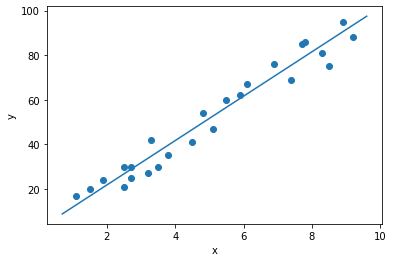

In [22]:
w = regressor.weight
b = regressor.bias
x=[2.5,5.1,3.2,8.5,3.5,1.5,9.2,5.5,8.3,2.7,7.7,5.9,4.5,3.3,1.1,8.9,2.5,1.9,6.1,7.4,2.7,4.8,3.8,6.9,7.8] 
y=[21,47,27,75,30,20,88,60,81,25,85,62,41,42,17,95,30,24,67,69,30,54,35,76,86]
plt.scatter(x,y)
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = b + w * x_vals
plt.plot(x_vals, y_vals)
plt.xlabel('x')
plt.ylabel('y')
plt.show()